<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Explainable-AI/LIME_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=65522ec62e6fb446897bf70530ab68a7ecd76e17d9776cb5f2c1d7dd96ab5383
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Image Processing
from PIL import Image
import numpy as np

# LIME for Explainability
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Visualization
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
model = load_model('/content/drive/My Drive/tumor_model/model_v1.h5')

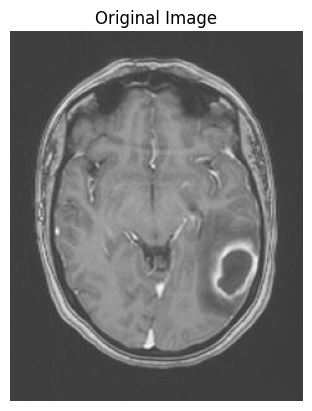

In [11]:
from tensorflow.keras.preprocessing.image import load_img
img_path = '/content/drive/MyDrive/test set/glioma/Test/G_290.jpg'

# Load and display the image
img = load_img(img_path)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")  # Turn off axis
plt.show()

In [12]:
img_path='/content/drive/MyDrive/test set/glioma/Test/G_290.jpg'
img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

In [13]:
def get_img_array(img_path, size):
    # img is a PIL image of size 299x299
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # array is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

In [14]:
class_indices = {0: 'Glioma', 1: 'Meningioma', 2: 'Pituitary'}
prediction = model.predict(img)
predicted_class = class_indices[np.argmax(prediction)]

print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The predicted class is: Glioma


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

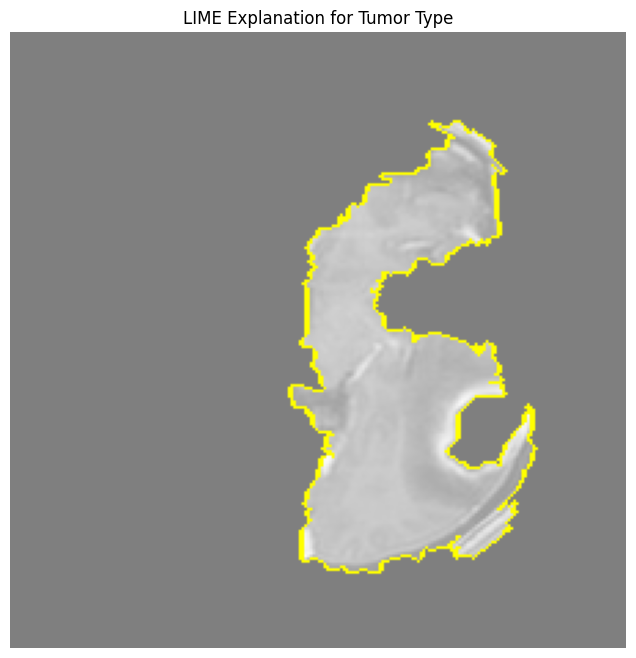

In [10]:
# Initialize LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction for the image
explanation = explainer.explain_instance(
    img[0],  # Pass the image (without batch dimension)
    model.predict,
    top_labels=3,
    hide_color=0,
    num_samples=1000
)

# Visualize the explanation for the top predicted label
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],  # The top predicted label index
    positive_only=True,
    num_features=5,  # Number of superpixels to display
    hide_rest=True
)

# Display the visualization
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))  # Normalize temp for display
plt.title(f"LIME Explanation for Tumor Type")
plt.axis('off')
plt.show()

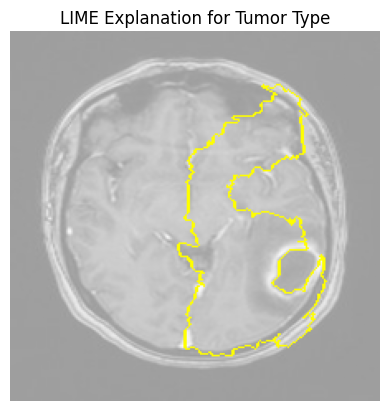

In [15]:
# Visualize the explanation for the top predicted label
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],  # The top predicted label index
    positive_only=True,
    num_features=5,  # Number of superpixels to display
    hide_rest=False
)

# Display the visualization
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))  # Normalize temp for display
plt.title(f"LIME Explanation for Tumor Type")
plt.axis('off')
plt.show()